In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [262]:
# Load the dataset
data_path = 'updated_with_cities.csv'
df = pd.read_csv(data_path)

In [263]:
df.drop(['Unnamed: 0', 'latitude', 'longitude'], axis=1, inplace=True)

In [264]:
# Replace '\N' with NaN
df.replace('\\N', np.nan, inplace=True)

In [265]:
# Drop the 'house_keywords' column if it's not being used
if 'house_keywords' in df.columns:
    df = df.drop('house_keywords', axis=1)


In [266]:
# Define categorical and numerical columns
categorical_cols = ['house_type', 'neighbourhood_quality', 'house_condition', 'crime_rate', 'city']
numerical_cols = ['bedrooms', 'bathrooms', 'garden_size']

In [267]:
# Convert categorical columns to type 'category' if not already
for col in categorical_cols:
    if df[col].dtype != 'category':
        df[col] = df[col].astype('category')


In [268]:
# Handle missing values if any (optional, based on your data)
df.fillna({
    'bedrooms': df['bedrooms'].median(),
    'bathrooms': df['bathrooms'].median(),
    'garden_size': df['garden_size'].median(),
    'house_type': df['house_type'].mode()[0],
    'neighbourhood_quality': df['neighbourhood_quality'].mode()[0],
    'house_condition': df['house_condition'].mode()[0],
    'crime_rate': df['crime_rate'].mode()[0],
    'city': df['city'].mode()[0]
}, inplace=True)

In [269]:
# Define the features (X) and the target variable (y)
X = df.drop(['price'], axis=1)
y = df['price']


In [270]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough',  # Apply OneHotEncoder to categorical columns and pass through numerical columns
   
)
column_transformer.set_params(sparse_threshold=0) 

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['house_type', 'neighbourhood_quality',
                                  'house_condition', 'crime_rate', 'city'])])

In [271]:
# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', DecisionTreeRegressor(random_state=42))
])


In [272]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [273]:
# Display the data types of each column
print(df.dtypes)


house_type               category
price                     float64
bedrooms                    int64
bathrooms                   int64
neighbourhood_quality    category
house_condition          category
crime_rate               category
garden_size               float64
city                     category
dtype: object


In [274]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


house_type               0
price                    0
bedrooms                 0
bathrooms                0
neighbourhood_quality    0
house_condition          0
crime_rate               0
garden_size              0
city                     0
dtype: int64


In [275]:
# Print unique values for each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


house_type: ['Terraced', 'Land', 'Semi-Detached', 'Bungalow', 'Detached', 'Flat', 'Park Home']
Categories (7, object): ['Bungalow', 'Detached', 'Flat', 'Land', 'Park Home', 'Semi-Detached', 'Terraced']
neighbourhood_quality: ['Alright', 'Pleasant', 'Rough', 'Outstanding', 'Abysmal']
Categories (5, object): ['Abysmal', 'Alright', 'Outstanding', 'Pleasant', 'Rough']
house_condition: ['Abysmal', 'Pleasant', 'Alright', 'Rough', 'Outstanding']
Categories (5, object): ['Abysmal', 'Alright', 'Outstanding', 'Pleasant', 'Rough']
crime_rate: ['Low', 'Medium', 'Non Existent', 'High', 'Very Low', 'Very High', 'Extreme']
Categories (7, object): ['Extreme', 'High', 'Low', 'Medium', 'Non Existent', 'Very High', 'Very Low']
city: ['Scopwick', 'Glasgow', 'Winterbourne', 'Hatfield', 'Exeter', ..., 'Downley', 'Frithsden', 'Saint Ann's', 'Wolverley', 'Brandsby']
Length: 5781
Categories (5781, object): ['07815306972', '37', 'Abbeydale', 'Abbeymead', ..., 'Ystalyfera', 'Ystrad', 'Ystrad Mynach', 'Ystradgynl

In [276]:
# Convert numeric columns and check for conversion issues
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        print(f"Non-numeric entries found in {col}")


In [277]:
# Check for and handle missing values
print(df[numerical_cols + categorical_cols].isnull().sum())


bedrooms                 0
bathrooms                0
garden_size              0
house_type               0
neighbourhood_quality    0
house_condition          0
crime_rate               0
city                     0
dtype: int64


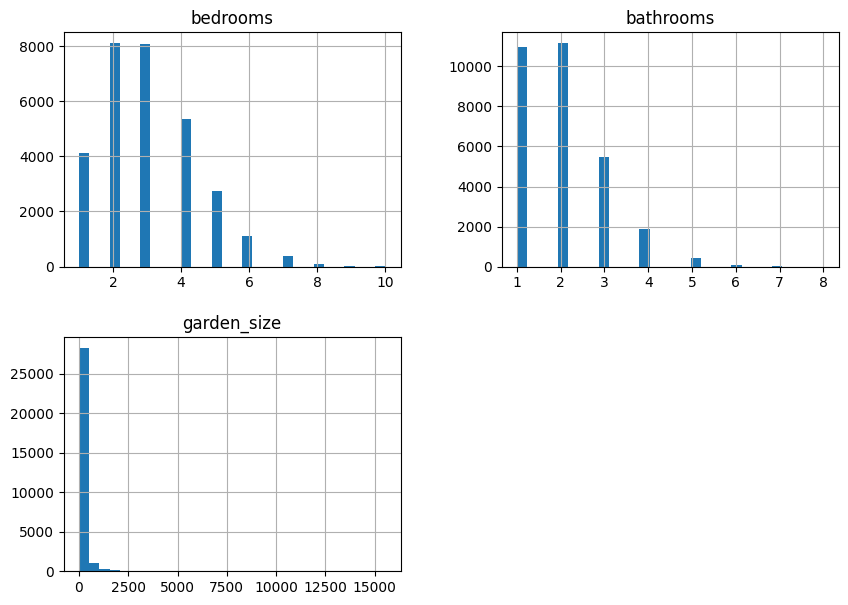

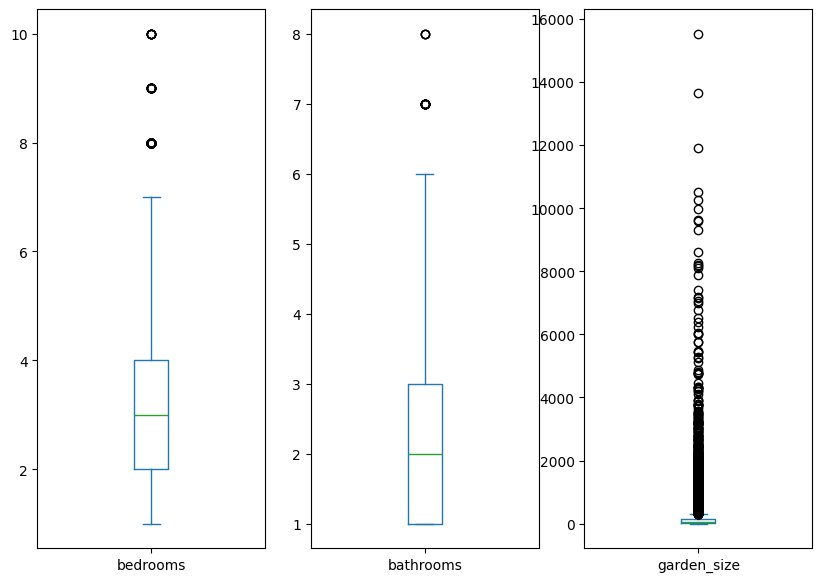

In [278]:
import matplotlib.pyplot as plt

# Histograms for numeric columns
df[numerical_cols].hist(bins=30, figsize=(10, 7))
plt.show()

# Box plots for numeric columns to check for outliers
df[numerical_cols].plot(kind='box', figsize=(10, 7), subplots=True, layout=(1, len(numerical_cols)))
plt.show()


In [279]:
# Display a random sample of the DataFrame
print(df.sample(10))


          house_type      price  bedrooms  bathrooms neighbourhood_quality  \
27377       Terraced  314302.57         7          2               Alright   
15187       Terraced   98266.04         6          3                 Rough   
7351        Bungalow  758935.57         4          1               Alright   
11039  Semi-Detached  233715.98         3          1               Alright   
29673       Terraced  179630.68         2          1                 Rough   
15408       Terraced  540591.44         3          2           Outstanding   
15903       Bungalow  785555.47         4          3               Alright   
19763      Park Home  125683.40         4          3                 Rough   
118    Semi-Detached  250905.15         3          3               Alright   
9058        Terraced  224786.72         3          3               Alright   

      house_condition crime_rate  garden_size              city  
27377         Alright       High       106.84    City not found  
15187    

In [280]:
# Display the remaining columns to ensure 'house_keywords' is removed
print(df.columns)


Index(['house_type', 'price', 'bedrooms', 'bathrooms', 'neighbourhood_quality',
       'house_condition', 'crime_rate', 'garden_size', 'city'],
      dtype='object')


In [281]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['house_type',
                                                   'neighbourhood_quality',
                                                   'house_condition',
                                                   'crime_rate', 'city'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [282]:
# Example user input for features and budget
user_input = {
    'bedrooms': 2,
    'bathrooms': 1,
    'city': 'London',
    'house_type': 'Terraced',
    'budget': 500000  # User's budget
}

# Define default values for other necessary fields not specified by the user
default_values = {
    'house_type': df['house_type'].mode()[0],
    'garden_size': df['garden_size'].median(),
    'neighbourhood_quality': df['neighbourhood_quality'].mode()[0],
    'house_condition': df['house_condition'].mode()[0],
    'crime_rate': df['crime_rate'].mode()[0]
}

# Combine default values with user input
full_input = {**default_values, **user_input}
input_df = pd.DataFrame([full_input])



In [283]:

predicted_price = pipeline.predict(input_df.drop('budget', axis=1))
print(f"Estimated price for the specified features: ${predicted_price[0]:,.2f}")


Estimated price for the specified features: $419,367.74


In [284]:
# Filter the dataset based on user's criteria and budget
matching_houses = df[
    (df['bedrooms'] == user_input['bedrooms']) &
    (df['bathrooms'] == user_input['bathrooms']) &
    (df['house_type'] == user_input['house_type']) &
    (df['city'] == user_input['city']) &
    (df['price'] <= user_input['budget'])
]

# Sort the matching houses by price in ascending order
matching_houses_sorted = matching_houses.sort_values(by='price', ascending=True).head(10)

# Check if any houses match the criteria
if not matching_houses_sorted.empty:
    print("Houses matching your criteria and budget:")
    print(matching_houses_sorted[['bedrooms', 'bathrooms', 'house_type', 'city', 'price']])
else:
    print("No houses found that match all criteria within the specified budget.")


Houses matching your criteria and budget:
       bedrooms  bathrooms house_type    city      price
3733          3          2   Terraced  London   41151.04
29032         3          2   Terraced  London   53639.77
4731          3          2   Terraced  London   55724.51
21542         3          2   Terraced  London   72909.68
22145         3          2   Terraced  London  109790.29
4971          3          2   Terraced  London  115967.45
17224         3          2   Terraced  London  118278.01
24083         3          2   Terraced  London  121041.51
3315          3          2   Terraced  London  121465.28
16296         3          2   Terraced  London  124260.45


In [285]:
# Print the number of unique cities and the list of unique cities
unique_cities = df['city'].unique()
print("Number of unique cities:", len(unique_cities))
print("List of unique cities:", unique_cities)


Number of unique cities: 5781
List of unique cities: ['Scopwick', 'Glasgow', 'Winterbourne', 'Hatfield', 'Exeter', ..., 'Downley', 'Frithsden', 'Saint Ann's', 'Wolverley', 'Brandsby']
Length: 5781
Categories (5781, object): ['07815306972', '37', 'Abbeydale', 'Abbeymead', ..., 'Ystalyfera', 'Ystrad', 'Ystrad Mynach', 'Ystradgynlais']


In [286]:
# Find the city that appears the most in the dataset
most_common_city = df['city'].value_counts().idxmax()
most_common_city_count = df['city'].value_counts().max()

print("The city that appears the most:", most_common_city)
print("Number of occurrences:", most_common_city_count)


The city that appears the most: London
Number of occurrences: 2444
